2023.04.10 박진윤 선임연구원, 태안군 인공지능유합산업진흥원

1. <code>pip install cdflib</code>
2. run following code under 'data' path

<code> python prepare_data_h36m.py --from-source-cdf ./h36m </code>

## Visualize Human 3.6M Pose public dataset

In [1]:
dataset_name = 'H36M'

In [3]:
ori_dir = f'./dataset/Human3.6M/data/'
prcs_dir = f'./dataset/preprocess/{dataset_name}/'

## Library import

In [11]:
import matplotlib.pyplot
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import os
import natsort
import imageio
import cv2
import glob
import sys

import xml.etree.ElementTree as ET
# %matplotlib notebook

In [5]:
def createFolder(directory):
    try:
        if os.path.exists(directory):
            print('Already Exists')
        if not os.path.exists(directory):
            os.makedirs(directory)
            print('Sucess creating directory. -> ' + directory)
    except OSError:
        print ('Error: Creating directory.' +  directory)

## Assert joint index

In [6]:
# joint connection of h36m dataset
bones_3d = [[0,1],[1,2],[2,3],[0,4],[4,5],[5,6],
           [0,7],[7,8],[8,9],[9,10],[8,11],[11,12],[12,13],
           [8,14],[14,15],[15,16]]

In [35]:
activity = [[0,'Directions'],
 [1,'Discussion'],
 [2,'Eating'],
 [3,'Greeting'],
 [4,'Phoning'],
 [5,'Photo'],
 [6,'Posing'],
 [7,'Purchases'],
 [8,'Sitting'],
 [9,'SittingDown'],
 [10,'Smoking'],
 [11,'Waiting'],
 [12,'WalkDog'],
 [13,'WalkTogether'],
 [14,'Walking']]

## Check data format

In [8]:
arg_dataset = 'h36m'
arg_keypoints = 'gt'

In [9]:
fn_3d = ori_dir + 'data_3d_' + arg_dataset + '.npz'

print(fn_3d)

./dataset/Human3.6M/data/data_3d_h36m.npz


In [12]:
sys.path.append('./dataset/Human3.6M')
from common.h36m_dataset import Human36mDataset
# dataset_3d = Human36mDataset(fn_3d)
dataset_3d = Human36mDataset(fn_3d, remove_static_joints=False)

32


In [13]:
#subject list
dataset_3d.subjects()

dict_keys(['S1', 'S5', 'S6', 'S7', 'S8', 'S9', 'S11'])

In [32]:
subjects = list(dataset_3d.subjects())

In [14]:
#action list
dataset_3d['S5'].keys(), dataset_3d['S1'].keys()

(dict_keys(['Waiting 2', 'Purchases 1', 'Discussion 2', 'Walking', 'Smoking 1', 'Posing', 'Walking 1', 'WalkDog 1', 'Smoking', 'Discussion 3', 'Photo 2', 'Directions 1', 'Eating', 'WalkDog', 'WalkTogether', 'Purchases', 'Photo', 'SittingDown', 'Phoning', 'Greeting 1', 'Waiting 1', 'Sitting', 'SittingDown 1', 'Phoning 1', 'Posing 1', 'Greeting 2', 'WalkTogether 1', 'Sitting 1', 'Directions 2', 'Eating 1']),
 dict_keys(['Purchases 1', 'Discussion', 'Walking', 'Smoking 1', 'Sitting 2', 'Posing', 'Walking 1', 'SittingDown 2', 'Smoking', 'WalkDog 1', 'Directions 1', 'Eating', 'Photo 1', 'WalkTogether', 'Purchases', 'Greeting', 'Waiting', 'Photo', 'SittingDown', 'Directions', 'Phoning', 'Greeting 1', 'Waiting 1', 'Discussion 1', 'WalkDog', 'Phoning 1', 'Posing 1', 'WalkTogether 1', 'Eating 2', 'Sitting 1']))

In [15]:
#list of information in 3d dataset
dataset_3d['S1']['Discussion 1'].keys()

dict_keys(['positions', 'cameras'])

In [16]:
#checking the shape of 3d dataset
dataset_3d['S1']['Discussion 1']['positions'].shape

(3805, 17, 3)

In [18]:
data_3d = dataset_3d['S1']['Discussion 1']['positions'][10]
data_3d.shape, data_3d

((17, 3),
 array([[-0.558101  ,  0.141726  ,  0.938813  ],
        [-0.67187077,  0.07385716,  0.95001924],
        [-0.6546506 ,  0.11767462,  0.50963396],
        [-0.6684288 ,  0.18162316,  0.06016291],
        [-0.444331  ,  0.20959496,  0.9276068 ],
        [-0.45023102,  0.12758675,  0.49241108],
        [-0.49315202,  0.26376322,  0.06122969],
        [-0.5974489 ,  0.19180991,  1.1634316 ],
        [-0.6171672 ,  0.21828736,  1.4183807 ],
        [-0.59011763,  0.15883346,  1.5203966 ],
        [-0.62647974,  0.22612561,  1.6062748 ],
        [-0.48689085,  0.27549544,  1.3677185 ],
        [-0.26529256,  0.13869329,  1.2679441 ],
        [-0.2569279 , -0.08746215,  1.378187  ],
        [-0.73250496,  0.14000122,  1.3602519 ],
        [-0.73188984, -0.11642318,  1.2505825 ],
        [-0.56502527, -0.28571692,  1.3334265 ]], dtype=float32))

## Rearrange data format

In [36]:
for i in activity:
    createFolder(prcs_dir + '{}'.format(i[1]))

Sucess creating directory. -> ./dataset/preprocess/H36M/Directions
Sucess creating directory. -> ./dataset/preprocess/H36M/Discussion
Sucess creating directory. -> ./dataset/preprocess/H36M/Eating
Sucess creating directory. -> ./dataset/preprocess/H36M/Greeting
Sucess creating directory. -> ./dataset/preprocess/H36M/Phoning
Sucess creating directory. -> ./dataset/preprocess/H36M/Photo
Sucess creating directory. -> ./dataset/preprocess/H36M/Posing
Sucess creating directory. -> ./dataset/preprocess/H36M/Purchases
Sucess creating directory. -> ./dataset/preprocess/H36M/Sitting
Sucess creating directory. -> ./dataset/preprocess/H36M/SittingDown
Sucess creating directory. -> ./dataset/preprocess/H36M/Smoking
Sucess creating directory. -> ./dataset/preprocess/H36M/Waiting
Sucess creating directory. -> ./dataset/preprocess/H36M/WalkDog
Sucess creating directory. -> ./dataset/preprocess/H36M/WalkTogether
Sucess creating directory. -> ./dataset/preprocess/H36M/Walking


In [39]:
for sub in subjects:
    action_list = list(dataset_3d[sub])
    for act in action_list:
        if '1' in act:
            txt_file = prcs_dir + f'{act[:-2]}/{sub}_e01.txt'
            data = dataset_3d[sub][act]['positions']
        elif '2' in act:
            txt_file = prcs_dir + f'{act[:-2]}/{sub}_e02.txt'
            data = dataset_3d[sub][act]['positions']
        elif '3' in act:
            txt_file = prcs_dir + f'{act[:-2]}/{sub}_e03.txt'
            data = dataset_3d[sub][act]['positions']
        else:
            txt_file = prcs_dir + f'{act}/{sub}_e00.txt'
            data = dataset_3d[sub][act]['positions']
        
        print(f'Writing for {txt_file}')
        with open(txt_file, 'w') as f:
            for frame_cnt in range(len(data)):
                for k in range(17):
                    x = str(data[frame_cnt][k][0])
                    y = str(data[frame_cnt][k][1])
                    z = str(data[frame_cnt][k][2])
                    f.write(x + '\t' + y + '\t' + z + '\t')
                f.write('\n')
            f.close()

Writing for ./dataset/preprocess/H36M/Purchases/S1_e01.txt
Writing for ./dataset/preprocess/H36M/Discussion/S1_e00.txt
Writing for ./dataset/preprocess/H36M/Walking/S1_e00.txt
Writing for ./dataset/preprocess/H36M/Smoking/S1_e01.txt
Writing for ./dataset/preprocess/H36M/Sitting/S1_e02.txt
Writing for ./dataset/preprocess/H36M/Posing/S1_e00.txt
Writing for ./dataset/preprocess/H36M/Walking/S1_e01.txt
Writing for ./dataset/preprocess/H36M/SittingDown/S1_e02.txt
Writing for ./dataset/preprocess/H36M/Smoking/S1_e00.txt
Writing for ./dataset/preprocess/H36M/WalkDog/S1_e01.txt
Writing for ./dataset/preprocess/H36M/Directions/S1_e01.txt
Writing for ./dataset/preprocess/H36M/Eating/S1_e00.txt
Writing for ./dataset/preprocess/H36M/Photo/S1_e01.txt
Writing for ./dataset/preprocess/H36M/WalkTogether/S1_e00.txt
Writing for ./dataset/preprocess/H36M/Purchases/S1_e00.txt
Writing for ./dataset/preprocess/H36M/Greeting/S1_e00.txt
Writing for ./dataset/preprocess/H36M/Waiting/S1_e00.txt
Writing for ./d

Writing for ./dataset/preprocess/H36M/Discussion/S8_e01.txt
Writing for ./dataset/preprocess/H36M/SittingDown/S8_e01.txt
Writing for ./dataset/preprocess/H36M/Phoning/S8_e01.txt
Writing for ./dataset/preprocess/H36M/Posing/S8_e01.txt
Writing for ./dataset/preprocess/H36M/Photo/S8_e01.txt
Writing for ./dataset/preprocess/H36M/WalkTogether/S8_e01.txt
Writing for ./dataset/preprocess/H36M/Sitting/S8_e01.txt
Writing for ./dataset/preprocess/H36M/Eating/S8_e01.txt
Writing for ./dataset/preprocess/H36M/Purchases/S9_e01.txt
Writing for ./dataset/preprocess/H36M/Discussion/S9_e02.txt
Writing for ./dataset/preprocess/H36M/Walking/S9_e00.txt
Writing for ./dataset/preprocess/H36M/Smoking/S9_e01.txt
Writing for ./dataset/preprocess/H36M/Posing/S9_e00.txt
Writing for ./dataset/preprocess/H36M/Walking/S9_e01.txt
Writing for ./dataset/preprocess/H36M/WalkDog/S9_e01.txt
Writing for ./dataset/preprocess/H36M/Smoking/S9_e00.txt
Writing for ./dataset/preprocess/H36M/Directions/S9_e01.txt
Writing for ./da

In [40]:
print(txt_file)
data = np.loadtxt(txt_file)
action = txt_file.split('/')[-2]
incident = txt_file.split('/')[-1].split('.')[0]

action, incident

./dataset/preprocess/H36M/Eating/S11_e01.txt


('Eating', 'S11_e01')

In [41]:
data.shape, data[0]

((2275, 51),
 array([-0.29257   , -0.121461  ,  0.98631203, -0.42992657, -0.11267145,
         0.99859476, -0.4441787 , -0.11538523,  0.5368822 , -0.41995063,
         0.00724756,  0.09396011, -0.15521307, -0.13025056,  0.9740292 ,
        -0.15884012, -0.12094928,  0.51219684, -0.18519136, -0.0084888 ,
         0.06670363, -0.29473922, -0.1251146 ,  1.2406573 , -0.2901265 ,
        -0.10285138,  1.4895686 , -0.30235448, -0.16933906,  1.5777144 ,
        -0.30289862, -0.12048768,  1.6818203 , -0.12482845, -0.08622715,
         1.4976956 ,  0.15633309, -0.11294328,  1.4771773 ,  0.39014792,
        -0.19459659,  1.4951175 , -0.45557114, -0.09185244,  1.5027212 ,
        -0.7171851 , -0.08965088,  1.3943735 , -0.95066756, -0.1694333 ,
         1.3664274 ]))

## Visualization

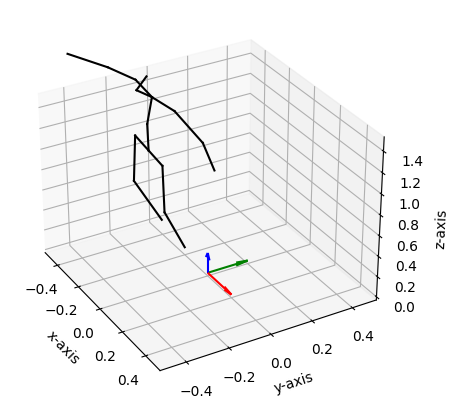

In [42]:
# draw 3d skeleton: one frame
frame_idx = 0

fig = plt.figure(figsize=(5,5)) #figsize=(20,20)
ax = fig.add_subplot(projection='3d')
ax.set_aspect('auto') ##############
ax.view_init(30, -30)

ax.set_zlim(0, 1.5)
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

ax.quiver(0,0,0,0.2,0,0, color='r') #x-axis
ax.quiver(0,0,0,0,0.2,0, color='g') #y-axis
ax.quiver(0,0,0,0,0,0.2, color='b') #z-axis

for bone in bones_3d:
    s = bone[0]
    e = bone[1]

    col = 'black'

    x = [(data[frame_idx][s*3]), (data[frame_idx][e*3])]
    y = [(data[frame_idx][s*3+1]), (data[frame_idx][e*3+1])]
    z = [(data[frame_idx][s*3+2]), (data[frame_idx][e*3+2])]

    ax.plot(x, y, z, c = col)
#     ax.text(x[0], y[0], z[0], s)
#     ax.text(x[1], y[1], z[1], e)    

plt.show()